In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
labelencoder = preprocessing.LabelEncoder()
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
from sklearn.model_selection import GridSearchCV   
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


Data Analysis

In [153]:
df = pd.read_csv("loan_data.csv")

In [154]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [155]:
df.isna().sum()

Loan_ID               0
Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

In [156]:
df.dropna(inplace=True)

In [157]:
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [158]:
df.duplicated().sum()

np.int64(0)

In [159]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

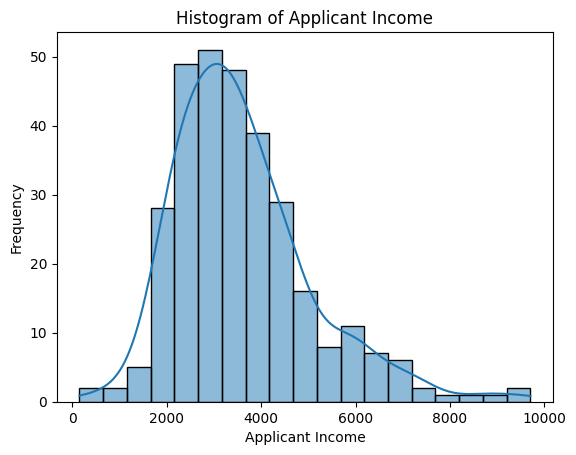

In [160]:
sns.histplot(df["ApplicantIncome"], kde=True)
plt.title("Histogram of Applicant Income")
plt.xlabel("Applicant Income")
plt.ylabel("Frequency")
plt.show()

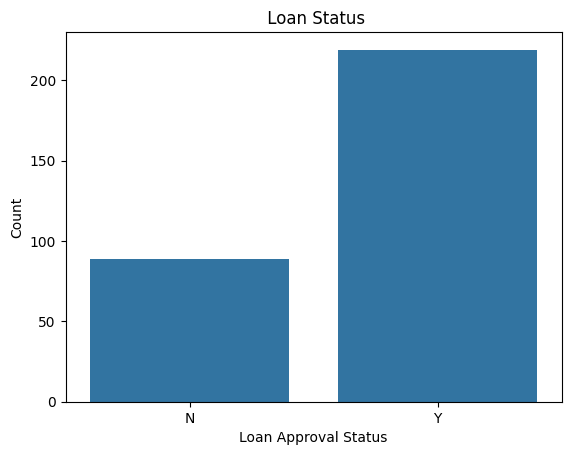

In [161]:
sns.countplot(x="Loan_Status", data=df)
plt.title(" Loan Status")
plt.xlabel("Loan Approval Status")
plt.ylabel("Count")
plt.show()

In [162]:
df.groupby("Education")["LoanAmount"].mean().reset_index()

,Education,LoanAmount
0,Graduate,105.344978
1,Not Graduate,102.531646


In [163]:
avg_loan_amount_by_education = df.groupby("Education")["LoanAmount"].mean().reset_index()

In [164]:
avg_loan_amount_by_education

,Education,LoanAmount
0,Graduate,105.344978
1,Not Graduate,102.531646


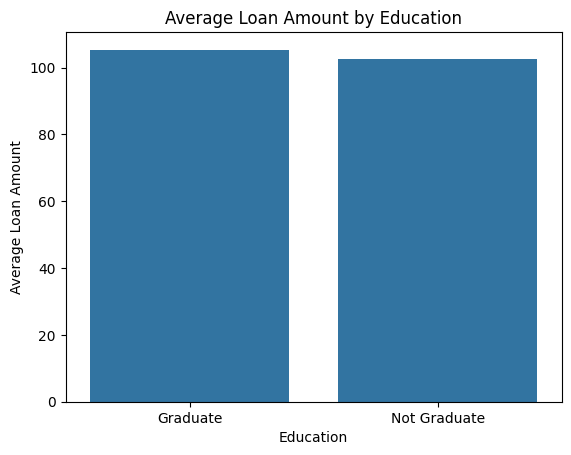

In [165]:
sns.barplot(x="Education", y="LoanAmount", data=avg_loan_amount_by_education)
plt.title("Average Loan Amount by Education")
plt.xlabel("Education")
plt.ylabel("Average Loan Amount")
plt.show()

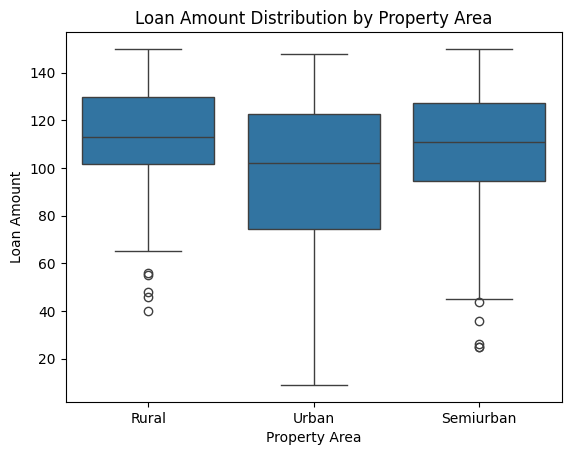

In [166]:
sns.boxplot(x = "Property_Area", y = "LoanAmount", data = df)
plt.title("Loan Amount Distribution by Property Area")
plt.xlabel("Property Area")
plt.ylabel("Loan Amount")
plt.show()

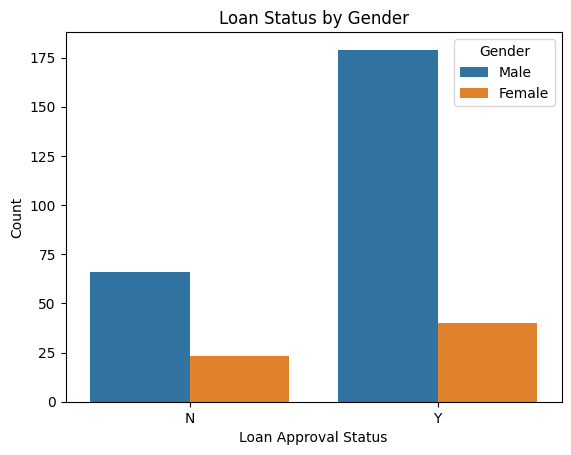

In [167]:
sns.countplot(x="Loan_Status", hue = "Gender", data=df)
plt.title("Loan Status by Gender")
plt.xlabel("Loan Approval Status")
plt.ylabel("Count")
plt.show()  

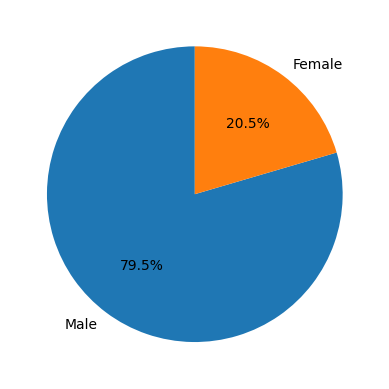

In [168]:
df["Gender"].value_counts().plot.pie(autopct="%1.1f%%", startangle=90)
plt.ylabel("")
plt.show()

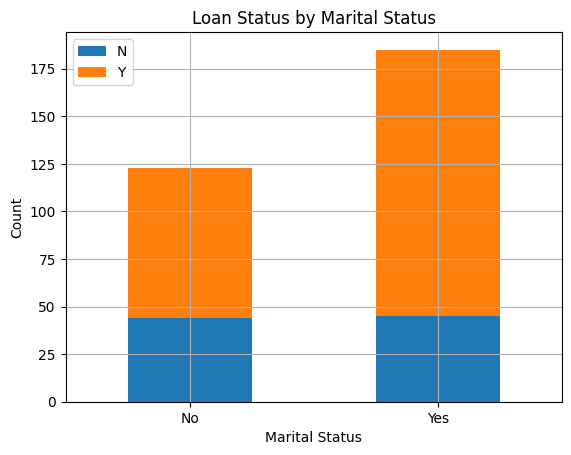

In [169]:
loan_ststus_by_married = df.groupby(["Married"])["Loan_Status"].value_counts().unstack()
loan_ststus_by_married.plot(kind="bar", stacked=True)
plt.title("Loan Status by Marital Status")
plt.xlabel("Marital Status")
plt.ylabel("Count")
plt.legend()
plt.xticks(rotation=0)
plt.grid()
plt.show()

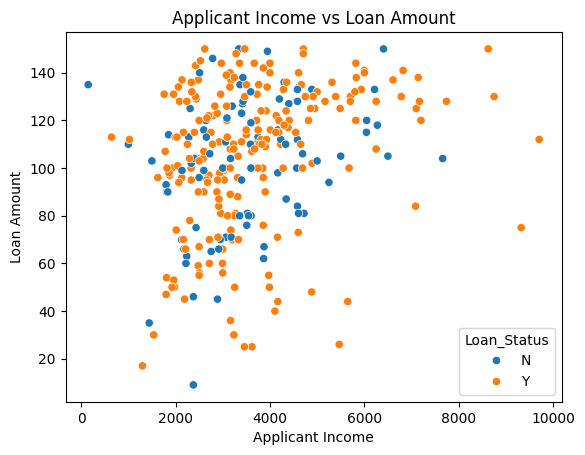

In [170]:
sns.scatterplot(x="ApplicantIncome", y="LoanAmount", hue="Loan_Status", data=df)
plt.title("Applicant Income vs Loan Amount")
plt.xlabel("Applicant Income")
plt.ylabel("Loan Amount")
plt.show()

In [171]:
numeric_df = df.select_dtypes(include=["int64", "float64"])

In [172]:
numeric_df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,4583,1508.0,128.0,360.0,1.0
1,3000,0.0,66.0,360.0,1.0
2,2583,2358.0,120.0,360.0,1.0
3,6000,0.0,141.0,360.0,1.0
4,2333,1516.0,95.0,360.0,1.0


In [173]:
correlation_matrix = numeric_df.corr()

In [174]:
correlation_matrix

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.243677,0.267628,-0.099571,0.030307
CoapplicantIncome,-0.243677,1.000000,0.123028,-0.004158,0.012715
LoanAmount,0.267628,0.123028,1.000000,0.135069,-0.043853
Loan_Amount_Term,-0.099571,-0.004158,0.135069,1.000000,0.015269
Credit_History,0.030307,0.012715,-0.043853,0.015269,1.000000


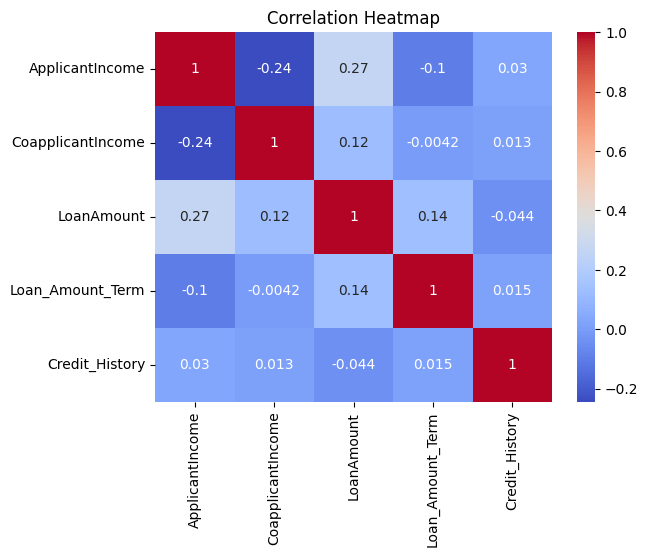

In [175]:
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [176]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [177]:
avg_loan_amount_by_employment = df.groupby("Self_Employed")["Loan_Amount_Term"].mean().reset_index()
avg_loan_amount_by_employment

,Self_Employed,Loan_Amount_Term
0,No,342.3
1,Yes,330.0


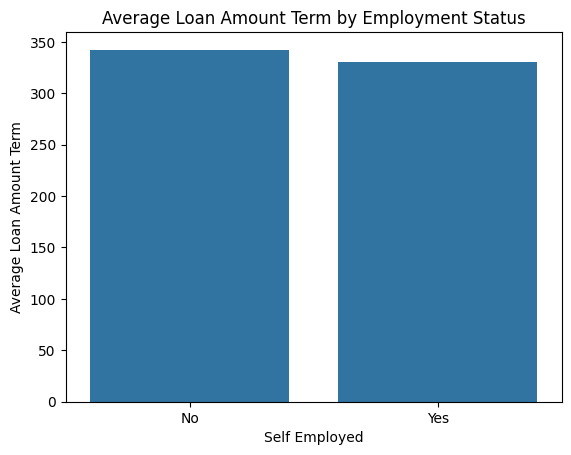

In [178]:
sns.barplot(x = "Self_Employed", y = "Loan_Amount_Term", data = avg_loan_amount_by_employment)
plt.title("Average Loan Amount Term by Employment Status")
plt.xlabel("Self Employed")
plt.ylabel("Average Loan Amount Term")
plt.show()

Feature Engeneering

In [179]:
df["Credit_History"].unique()

array([1., 0.])

In [180]:
x = df[["Married", "Education", "ApplicantIncome",  "LoanAmount",  "Credit_History"]]

In [181]:
x

,Married,Education,ApplicantIncome,LoanAmount,Credit_History
0,Yes,Graduate,4583,128.0,1.0
1,Yes,Graduate,3000,66.0,1.0
2,Yes,Not Graduate,2583,120.0,1.0
3,No,Graduate,6000,141.0,1.0
4,Yes,Not Graduate,2333,95.0,1.0
...,...,...,...,...,...
376,Yes,Graduate,5703,128.0,1.0
377,Yes,Graduate,3232,108.0,1.0
378,No,Graduate,2900,71.0,1.0
379,Yes,Graduate,4106,40.0,1.0


In [182]:
y = df["Loan_Status"]

In [183]:
y

0      N
1      Y
2      Y
3      Y
4      Y
      ..
376    Y
377    Y
378    Y
379    Y
380    N
Name: Loan_Status, Length: 308, dtype: object

In [184]:
# Encode target correctly (y is a Series)
y = pd.Series(labelencoder.fit_transform(y), index=y.index, name='Loan_Status')
y.head()

0    0
1    1
2    1
3    1
4    1
Name: Loan_Status, dtype: int64

In [185]:
y

0      0
1      1
2      1
3      1
4      1
      ..
376    1
377    1
378    1
379    1
380    0
Name: Loan_Status, Length: 308, dtype: int64

In [186]:
labelencoder.classes_

array(['N', 'Y'], dtype=object)

In [187]:
x

,Married,Education,ApplicantIncome,LoanAmount,Credit_History
0,Yes,Graduate,4583,128.0,1.0
1,Yes,Graduate,3000,66.0,1.0
2,Yes,Not Graduate,2583,120.0,1.0
3,No,Graduate,6000,141.0,1.0
4,Yes,Not Graduate,2333,95.0,1.0
...,...,...,...,...,...
376,Yes,Graduate,5703,128.0,1.0
377,Yes,Graduate,3232,108.0,1.0
378,No,Graduate,2900,71.0,1.0
379,Yes,Graduate,4106,40.0,1.0


In [188]:
x["Credit_History"] = labelencoder.fit_transform(x["Credit_History"])
x["Credit_History"]

C:\Users\HP\AppData\Local\Temp\ipykernel_2088\2327310713.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x["Credit_History"] = labelencoder.fit_transform(x["Credit_History"])


0      1
1      1
2      1
3      1
4      1
      ..
376    1
377    1
378    1
379    1
380    0
Name: Credit_History, Length: 308, dtype: int64

In [189]:
x["Married"] = labelencoder.fit_transform(x["Married"])
x["Education"] = labelencoder.fit_transform(x["Education"]) 

C:\Users\HP\AppData\Local\Temp\ipykernel_2088\1023647882.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x["Married"] = labelencoder.fit_transform(x["Married"])
C:\Users\HP\AppData\Local\Temp\ipykernel_2088\1023647882.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x["Education"] = labelencoder.fit_transform(x["Education"])


In [190]:
x

,Married,Education,ApplicantIncome,LoanAmount,Credit_History
0,1,0,4583,128.0,1
1,1,0,3000,66.0,1
2,1,1,2583,120.0,1
3,0,0,6000,141.0,1
4,1,1,2333,95.0,1
...,...,...,...,...,...
376,1,0,5703,128.0,1
377,1,0,3232,108.0,1
378,0,0,2900,71.0,1
379,1,0,4106,40.0,1


In [191]:
labelencoder.classes_

array(['Graduate', 'Not Graduate'], dtype=object)

In [192]:
x

,Married,Education,ApplicantIncome,LoanAmount,Credit_History
0,1,0,4583,128.0,1
1,1,0,3000,66.0,1
2,1,1,2583,120.0,1
3,0,0,6000,141.0,1
4,1,1,2333,95.0,1
...,...,...,...,...,...
376,1,0,5703,128.0,1
377,1,0,3232,108.0,1
378,0,0,2900,71.0,1
379,1,0,4106,40.0,1


Scaling


In [193]:
x = scaler.fit_transform(x)

In [194]:
x

array([[ 0.81539246, -0.58734842,  0.67389339,  0.79689813,  0.41364557],
       [ 0.81539246, -0.58734842, -0.41036528, -1.31665281,  0.41364557],
       [ 0.81539246,  1.70256694, -0.6959849 ,  0.52418188,  0.41364557],
       ...,
       [-1.22640329, -0.58734842, -0.47885919, -1.14620515,  0.41364557],
       [ 0.81539246, -0.58734842,  0.34717742, -2.20298062,  0.41364557],
       [-1.22640329, -0.58734842,  0.67389339,  0.96734579, -2.41752858]],
      shape=(308, 5))

In [195]:
import joblib
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

Training Model

In [196]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)   

In [197]:
def modelperformance(predictions):
    print("Accuracy Score in Model is {}".format(accuracy_score(y_test,predictions)))

In [198]:
log_model.fit(x_train, y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [199]:
x_train

array([[ 0.81539246, -0.58734842, -0.63913495,  0.55827142,  0.41364557],
       [ 0.81539246, -0.58734842,  0.5026586 ,  0.18328657,  0.41364557],
       [-1.22640329,  1.70256694, -0.98228946, -1.18029468,  0.41364557],
       ...,
       [-1.22640329, -0.58734842, -0.47885919, -1.14620515,  0.41364557],
       [-1.22640329, -0.58734842, -0.12406071,  0.7628086 ,  0.41364557],
       [ 0.81539246,  1.70256694,  0.47183634,  0.96734579,  0.41364557]],
      shape=(231, 5))

In [200]:
log_predictions = log_model.predict(x_test)

In [201]:
modelperformance(log_predictions)

Accuracy Score in Model is 0.8311688311688312


In [202]:
param_grid = {"n_neighbors": [3, 5, 7], 'weights': ['uniform', 'distance']}
gridkn = GridSearchCV(KNeighborsClassifier(), param_grid)
gridkn.fit(x_train, y_train.values.ravel())

,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",KNeighborsClassifier()
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'n_neighbors': [3, 5, ...], 'weights': ['uniform', 'distance']}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",None
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",None
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",None
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold and parameter candidate is displayed;- >2 : the score is also displayed;- >

In [203]:
gridkn.best_params_

{'n_neighbors': 5, 'weights': 'uniform'}

In [204]:
knpreds = gridkn.predict(x_test)    

In [205]:
modelperformance(knpreds)

Accuracy Score in Model is 0.8311688311688312


In [206]:
svm = SVC()
param_grid_svc= {'C': [0.01, 0.1, 0.5], 'kernel': ['linear', 'rbf', 'poly']}

In [207]:
gridsvc = GridSearchCV(svm, param_grid_svc)
gridsvc.fit(x_train, y_train.values.ravel())

,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",SVC()
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'C': [0.01, 0.1, ...], 'kernel': ['linear', 'rbf', ...]}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",None
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",None
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",None
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold and parameter candidate is displayed;- >2 : the score is also displayed;- >3 : the fold and candida

In [208]:
gridsvc.best_params_

{'C': 0.01, 'kernel': 'linear'}

In [209]:
pred_svc = gridsvc.predict(x_test)
modelperformance(pred_svc)

Accuracy Score in Model is 0.8311688311688312


In [210]:
joblib.dump(gridsvc, 'svc_model.pkl')

['svc_model.pkl']

In [211]:
testmodel = joblib.load('svc_model.pkl')

In [214]:
testmodel.predict([[0,3500,1,100,1]])

array([1])